### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [37]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [84]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    
    V = np.zeros(101)
    rewards = np.zeros(101)
    rewards[100] = 1 
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        A = np.zeros(101)
        stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        for a in stakes:
            # rewards[s+a], rewards[s-a] are immediate rewards.
            # V[s+a], V[s-a] are values of the next states.
            # This is the core of the Bellman equation: The expected value of your action is 
            # the sum of immediate rewards and the value of the next state.
            A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h) * (rewards[s-a] + V[s-a]*discount_factor)
        return A
    # Start with a random policy
    policy = [np.arange(1+s)/(1+s)for s in range( 101)]
    
    while True:
        # Evaluate the current policy
        for i in range(2):
            V = np.array([max(one_step_lookahead(s, V, rewards)) for s in range(101)])
           
        # Will be set to false if we make any changes to the policy
        policy_stable = True
        
        # For each state...
        for s in range(101):
            # The best action we would take under the current policy
            chosen_a = np.argmax(policy[s])
            
            # Find the best action by one-step lookahead
            # Ties are resolved arbitarily
            action_values = one_step_lookahead(s, V, rewards)
            best_a = np.argmax(action_values)
            
            # Greedily update the policy
            if chosen_a != best_a:
                policy_stable = False
            policy[s] = np.eye(101)[best_a]
        
        # If the policy is stable we've found an optimal policy. Return it
        if policy_stable:
            return policy, V
    
    return policy, V

In [88]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.,

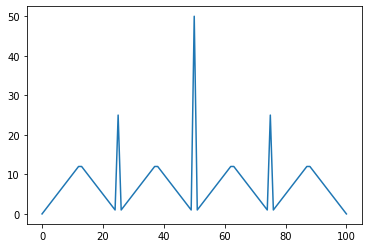

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 50, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [89]:
# Plotting Final Policy (action stake) vs State (Capital)

states = np.arange(101)
stakes = [np.argmax(policy[s]) for s in states]
plt.plot(states, stakes)
plt.show()
print(stakes)

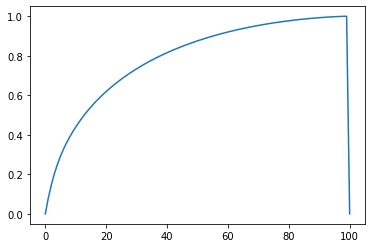

[0.         0.08096523 0.14789295 0.20389106 0.2513926  0.29229919
 0.32808514 0.35989807 0.38861533 0.4149189  0.43932532 0.4622269
 0.48367242 0.50389677 0.5229377  0.5409806  0.55808182 0.57434508
 0.58983233 0.60462148 0.61879037 0.63236973 0.64541127 0.6579502
 0.67000384 0.68162861 0.69282898 0.70361325 0.71401186 0.72404366
 0.73374042 0.7431246  0.75219773 0.76096842 0.76944742 0.77765308
 0.78560884 0.79332656 0.80081219 0.8080693  0.81510099 0.82191828
 0.8285352  0.83496264 0.84120848 0.84727583 0.85316537 0.85888078
 0.86442868 0.86981803 0.87505711 0.88015084 0.88510072 0.88990737
 0.89457211 0.89910008 0.90349775 0.90777089 0.91192355 0.9159567
 0.91986922 0.92366269 0.92734022 0.93090674 0.93436847 0.93772741
 0.94098261 0.94413368 0.94718057 0.95012764 0.95298112 0.95574296
 0.9584144  0.96099298 0.96347806 0.96587576 0.96818813 0.97041801
 0.97256789 0.97463252 0.97661627 0.97852482 0.98035478 0.98210807
 0.98378083 0.98537522 0.98689249 0.9883326  0.98969678 0.990983


In [87]:
plt.plot(states, v)
plt.show()
print(v)